<a href="https://colab.research.google.com/github/samuelhenrick1/Arduino/blob/main/AN%C3%81LISE_ESTAT%C3%8DSTICA_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação dos Pacotes que serão utilizados nesse notebook

In [233]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [234]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [235]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [236]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [237]:
install.packages('lme4')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [238]:
install.packages('pbkrtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [239]:
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [240]:
install.packages('rstatix')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [241]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Ativando as bibliotecas instaladas

In [242]:
library(ggplot2)
library(ggpubr)
library(skimr)
library(dplyr)

Carregando os dados Diamonds

In [243]:
data(diamonds)
diamantes <- diamonds


In [244]:
pacotes <- c("plotly","tidyverse","ggrepel","fastDummies","knitr","kableExtra",
             "splines","reshape2","PerformanceAnalytics","metan","correlation",
             "see","ggraph","nortest","rgl","car","olsrr","jtools","ggstance",
             "magick","cowplot","beepr","Rcpp", "readxl", "knitr","rmarkdown", "dplyr","psych", "ggplot2","ggpubr", "plyr", "skimr", "janitor")

 Qual é a estrutura do conjunto de dados “diamantes”?

In [245]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [246]:
dim(diamonds)


[1] 53940    10

Explore a parte inicial e a final do conjunto de dados

In [247]:
head(diamantes)


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [248]:
tail(diamantes)


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.72,Premium,D,SI1,62.7,59,2757,5.69,5.73,3.58
0.72,Ideal,D,SI1,60.8,57,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60,2757,5.66,5.68,3.56
0.86,Premium,H,SI2,61.0,58,2757,6.15,6.12,3.74
0.75,Ideal,D,SI2,62.2,55,2757,5.83,5.87,3.64


 Faça alguns sumários estatísticos para entender melhor a base de dados

In [249]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

A saída da função summary() está de acordo com a descrição mostrada 
anteriormente?

In [250]:
diamonds$color <- factor(diamonds$color, levels=rev(levels(diamonds$color)))

In [251]:
str(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "J"<"I"<"H"<"G"<..: 6 6 6 2 1 1 2 3 6 3 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [252]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   J: 2808   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   I: 5422   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   H: 8304   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   F: 9542   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     E: 9797   VVS1   : 3655   Max.   :79.00  
                                    D: 6775   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [253]:
df <- as.data.frame.table(table(diamonds$color))

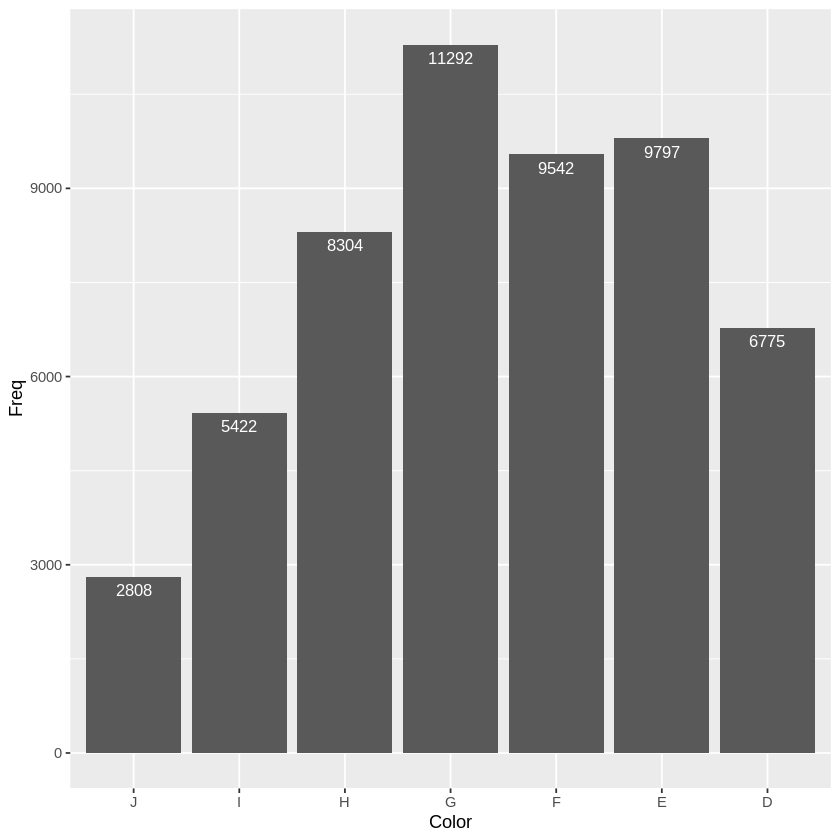

In [254]:
ggplot(df, aes(x = Var1, y = Freq)) + geom_bar( stat = "identity") + geom_text(aes(label = Freq), vjust=1.6, color="white", position = position_dodge(0.9), size=3.5) + labs(x = "Color", y = "Freq")

Explore a variável price, seguindo o modelo de exploração





In [255]:
if (knitr::is_latex_output()) {
     skim_without_charts(diamonds$price)
} else {
     skim(diamonds$price)
}

── Data Summary ────────────────────────
                           Values        
Name                       diamonds$price
Number of rows             53940         
Number of columns          1             
_______________________                  
Column type frequency:                   
  numeric                  1             
________________________                 
Group variables            None          

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate  mean    sd    p0   p25   p50   p75
1 data                  0             1 3933. 3989.   326   950  2401 5324.
   p100 hist 
1 18823 ▇▂▁▁▁


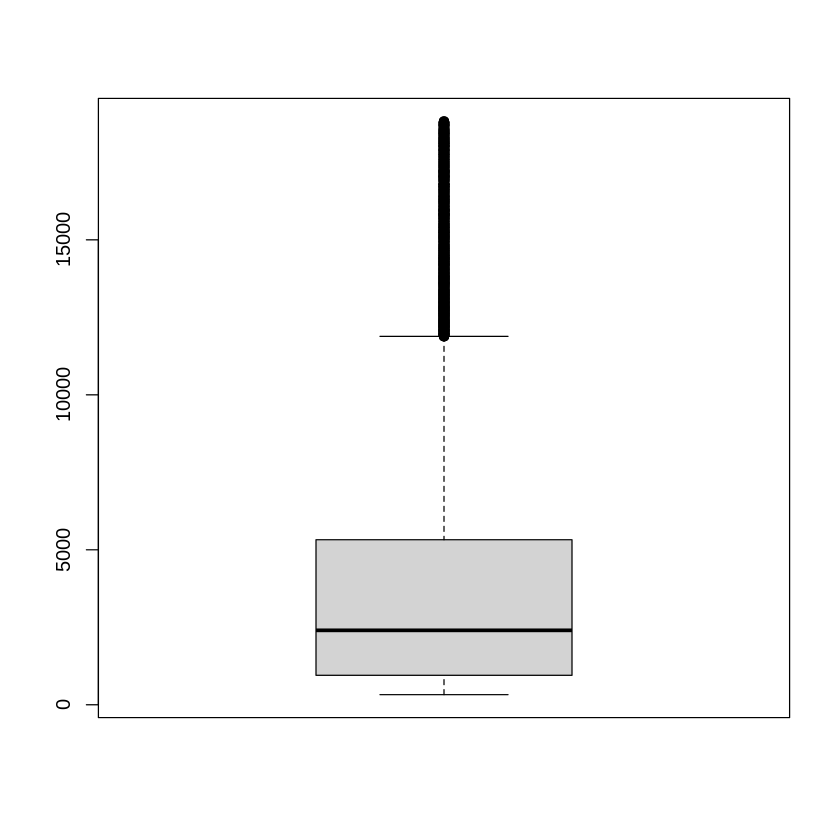

In [256]:
boxplot(diamonds$price)

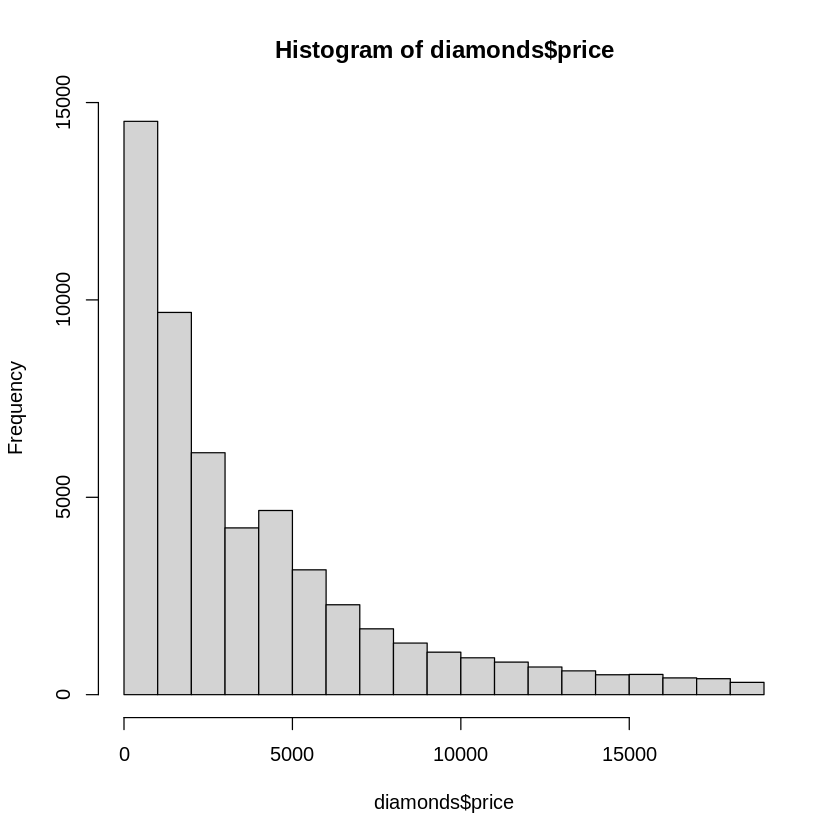

In [257]:
hist(diamonds$price)

Veja a distribuição da variável (histograma); observe a faixa de valores da variável e também.

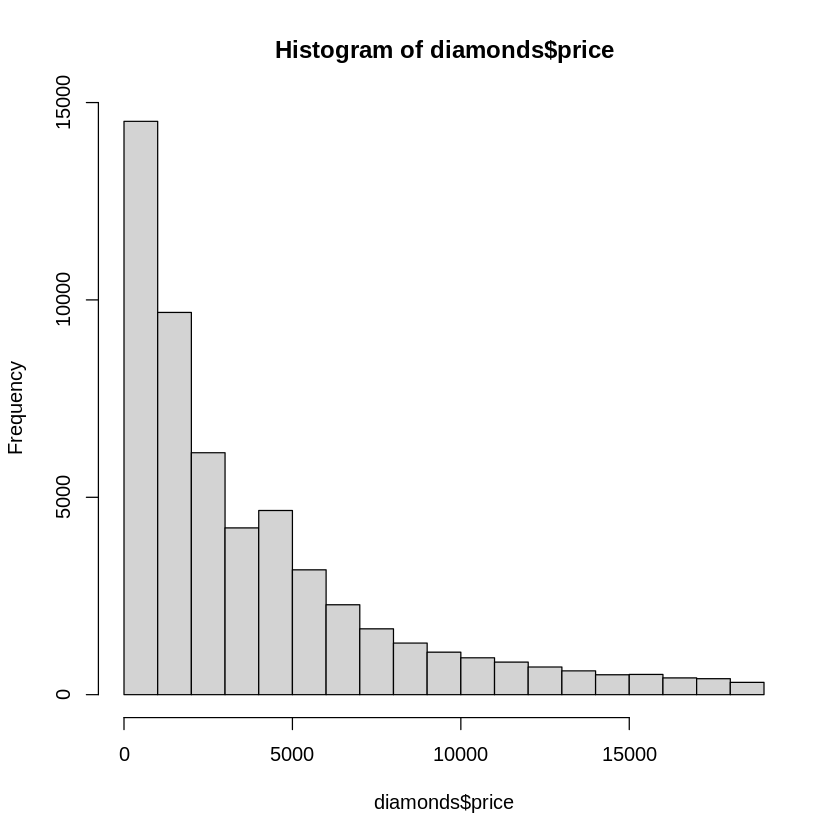

In [258]:
hist(diamonds$price)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



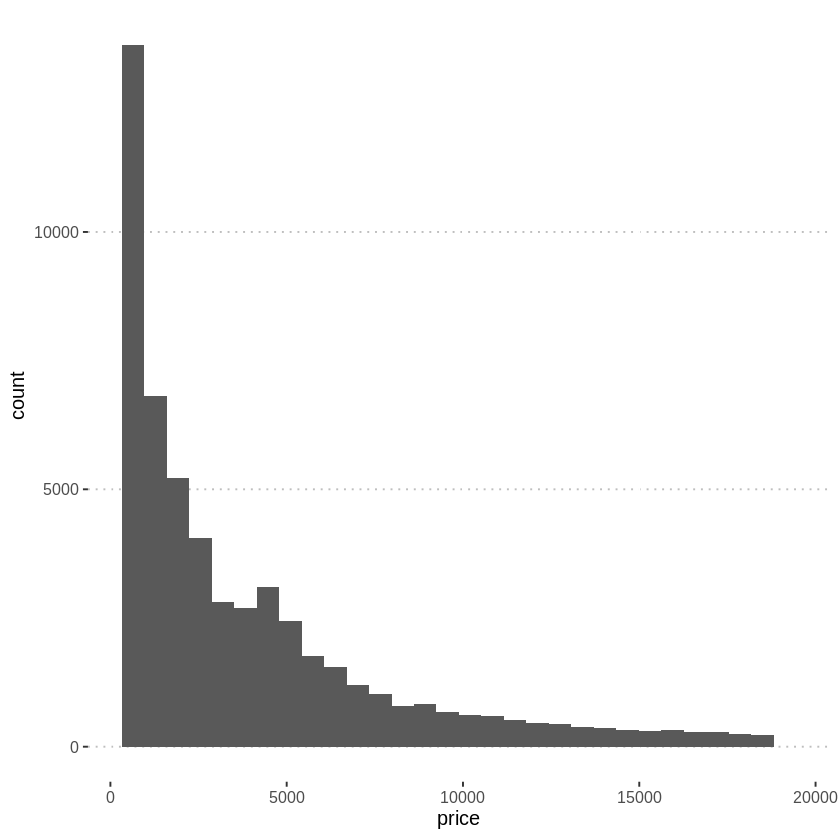

In [259]:
Price <- ggplot(data = diamonds) + 
  geom_histogram(aes(price)) + labs_pubr() + theme_pubclean()

Price

Explore também as variáveis carat, cut, color, clarity, x, y, z, depth e table, seguindo o modelo de exploração

In [260]:
if (knitr::is_latex_output()) {
  skim_without_charts(diamonds, - price)
} else {
  skim(diamonds, - price)
} 

── Data Summary ────────────────────────
                           Values  
Name                       diamonds
Number of rows             53940   
Number of columns          10      
_______________________            
Column type frequency:             
  factor                   3       
  numeric                  6       
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 cut                   0             1 TRUE           5
2 color                 0             1 TRUE           7
3 clarity               0             1 TRUE           8
  top_counts                                   
1 Ide: 21551, Pre: 13791, Ver: 12082, Goo: 4906
2 G: 11292, E: 9797, F: 9542, H: 8304          
3 SI1: 13065, VS2: 12258, SI2: 9194, VS1: 8171 

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable

Warning message:
“Use of `diamonds$carat` is discouraged. Use `carat` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Use of `diamonds$depth` is discouraged. Use `depth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Use of `diamonds$table` is discouraged. Use `table` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Use of `diamonds$x` is discouraged. Use `x` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Use of `diamonds$y` is discouraged. Use `y` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Use of `diamonds$y` is discouraged. Use `y` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



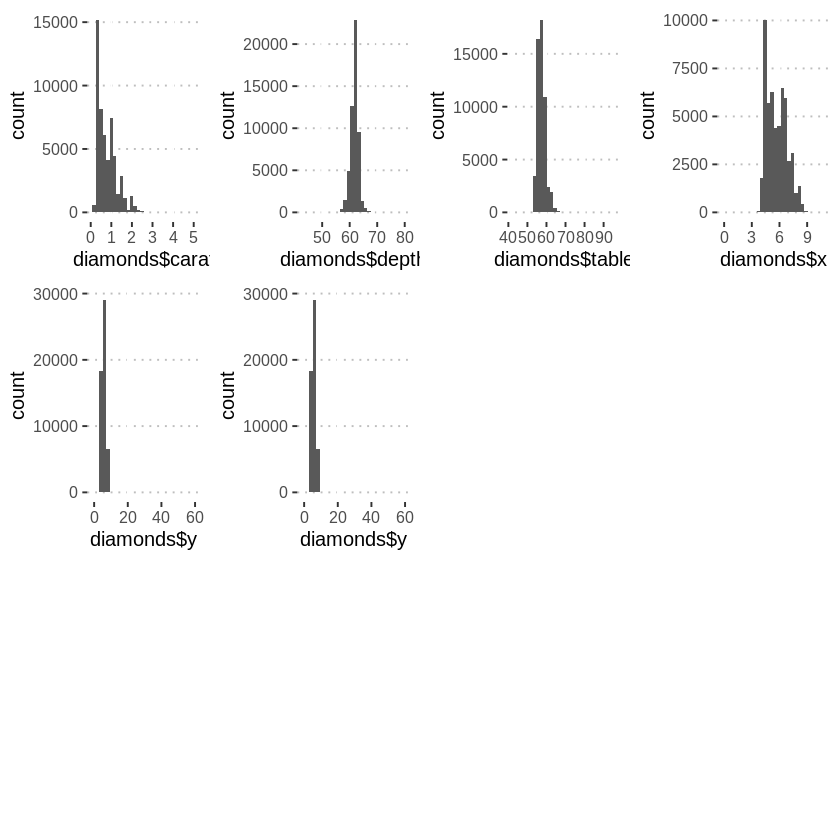

In [261]:
h2_Caract <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$carat))+ labs_pubr() + theme_pubclean()

h3_Depth <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$depth))+ labs_pubr() + theme_pubclean()

h4_table <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$table))+ labs_pubr() + theme_pubclean()

h5_x <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$x))+ labs_pubr() + theme_pubclean()

h6_y <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$y))+ labs_pubr() + theme_pubclean()

h7_z <- ggplot(data = diamonds) + geom_histogram(aes(x=diamonds$y))+ labs_pubr() + theme_pubclean()


ggarrange(ncol = 4, nrow = 3, h2_Caract, h3_Depth, h4_table, h5_x, h6_y, h7_z)

Crie boxplots para as variáveis numéricas; veja se existem dados anormais (outliers).

Warning message:
“Use of `diamonds$carat` is discouraged. Use `carat` instead.”
Warning message:
“Use of `diamonds$depth` is discouraged. Use `depth` instead.”
Warning message:
“Use of `diamonds$table` is discouraged. Use `table` instead.”
Warning message:
“Use of `diamonds$x` is discouraged. Use `x` instead.”
Warning message:
“Use of `diamonds$y` is discouraged. Use `y` instead.”
Warning message:
“Use of `diamonds$y` is discouraged. Use `y` instead.”


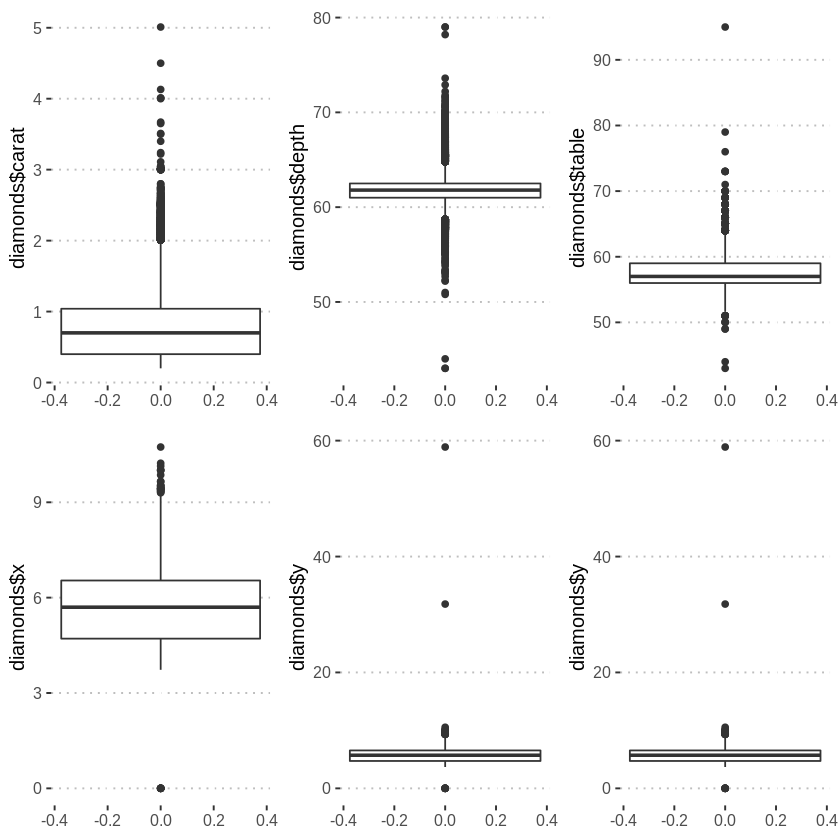

In [262]:
g2_Caract <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$carat))+ labs_pubr() + theme_pubclean()

g3_Depth <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$depth))+ labs_pubr() + theme_pubclean()

g4_table <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$table))+ labs_pubr() + theme_pubclean()

g5_x <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$x))+ labs_pubr() + theme_pubclean()

g6_y <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$y))+ labs_pubr() + theme_pubclean()

g7_z <- ggplot(data = diamonds) + geom_boxplot(aes(y=diamonds$y))+ labs_pubr() + theme_pubclean()


ggarrange(ncol = 3, nrow = 2, g2_Caract, g3_Depth, g4_table, g5_x, g6_y, g7_z) 

Utilize as variáveis categóricas para fazer o facetamento dos dados, mostrando alguns gráficos com 2 ou mais variáveis contínuas lado a lado.

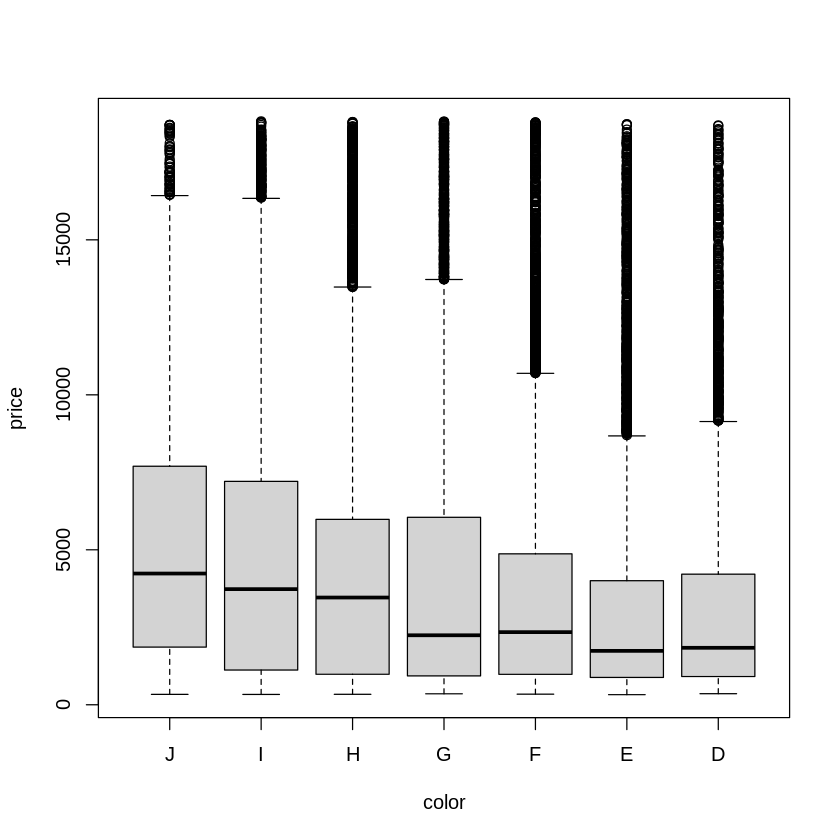

In [263]:
boxplot(price ~ color, data = diamonds)

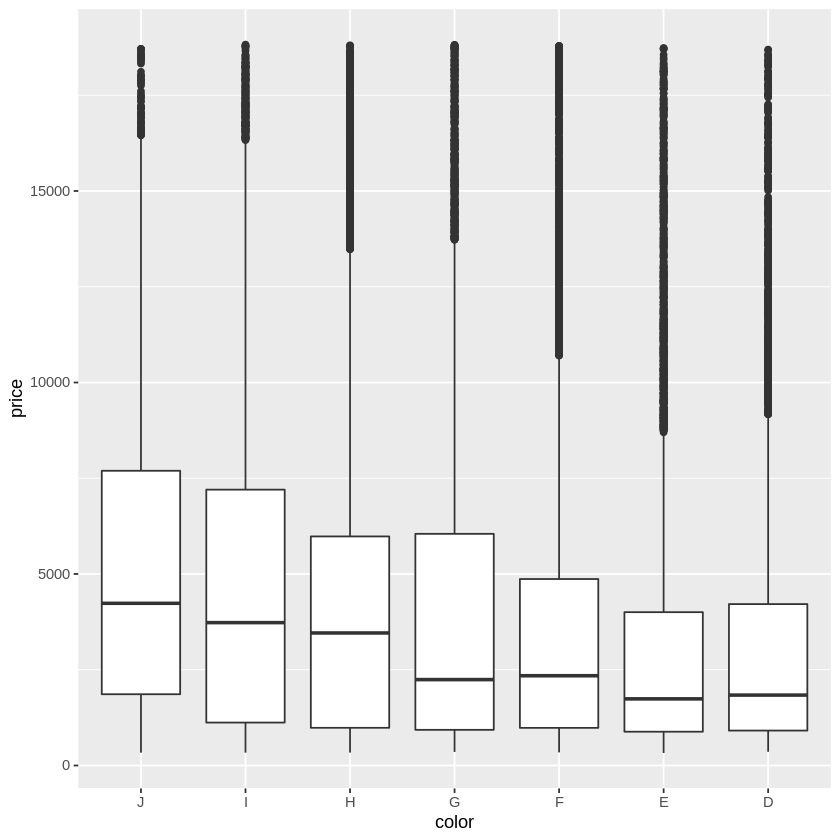

In [264]:
ggplot(data = diamonds, aes(x = color, y = price)) +
     geom_boxplot()

Para cada resultado/gráfico obtido, explique e discuta-os, de modo a construir um relatório de exploração dos dados, que deverá ser submetido